<a href="https://colab.research.google.com/github/SaashaJoshi/Pancreas-Cancer/blob/master/Proposed_Denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 36kB/s 
     |████████████████████████████████| 450kB 42.5MB/s 
     |████████████████████████████████| 3.9MB 38.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=4eae451cb3314758d5cec05176806878b0c35e6035aca27bceaadd1e813b3cf7
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstall

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
import sys
import cv2
import random
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from glob import glob

In [0]:
from PIL import Image
import os
import tensorflow as tf
import numpy as np
from matplotlib.pyplot import imshow

In [0]:
data_path = 'drive/My Drive/denoise_data/original_images'
output_path = working_path = 'drive/My Drive/'
g = glob(data_path + '/*.png')

# Print out the first 5 file names to verify we're in the right folder.
print ("Total of %d images.\nFirst 5 filenames:" % len(g))
print ('\n'.join(g[:5]))

Total of 934 images.
First 5 filenames:
drive/My Drive/denoise_data/original_images/13032.png
drive/My Drive/denoise_data/original_images/15000.png
drive/My Drive/denoise_data/original_images/14224.png
drive/My Drive/denoise_data/original_images/12150.png
drive/My Drive/denoise_data/original_images/13159.png


In [0]:
# # name = "image"
# # path = os.curdir + "/datasetfinal/"+ name

# test_dir = 'drive/My Drive/pancreas_data_original/test_images'
# train_dir = 'drive/My Drive/pancreas_data_original/train_images'

# new_path = 'drive/My Drive/pancreas_data_original/converted_train_images'
# if not os.path.exists(new_path):
#     os.makedirs(d)

['000149.png', '000150.png', '000148.png', '000145.png', '000143.png', '000144.png', '000141.png', '000140.png', '000134.png', '000137.png', '000135.png', '000132.png', '000131.png', '000130.png', '000129.png', '000127.png', '000124.png', '000125.png', '000123.png', '000117.png', '000126.png', '000118.png', '000116.png', '000119.png', '000115.png', '000113.png', '000114.png', '000112.png', '000110.png', '000111.png', '000109.png', '000105.png', '000108.png', '000103.png', '000101.png', '000104.png', '000102.png', '000100.png', '000146.png']


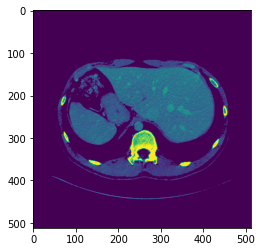

In [0]:
# dirs = os.listdir(train_dir)
# print(dirs)

# for f in dirs:
#   full_new_path = os.path.join(new_path, f)
#   fullpath = os.path.join(train_dir,f) 
#   if os.path.isfile(fullpath):    # os.path.isfile returns boolean value whether file exists or not
#     img=Image.open(fullpath)    # opens and identifies given image file
#     pixels = img.load()         # image data collected in Image.open is read here and loads pixel data
#     img_convert = img.convert('L')      # returns converted copy of image
#     imshow(img_convert)
#     img_convert.save(full_new_path)        # saves image under given filename

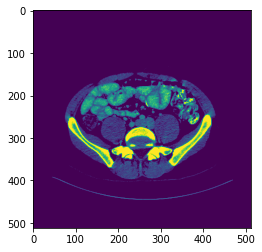

In [0]:
# # Verify images in new_path
# for f in os.listdir(new_path):
#   full_new_path = os.path.join(new_path, f)
#   img = Image.open(full_new_path)
#   imshow(img)

In [0]:
# noise_factor = 10

# def gauss_noise_gen(path, noise_factor = 10):
#   for f in os.listdir(path):
#     full_new_path = os.path.join(new_path, f)
#     img = Image.open(full_new_path)
#     # for batch_x, batch_y in batches:
#     # Generate Gaussian noise
#     sigma = np.random.exponential(0.15)
#     gauss = np.random.normal(loc = 0, scale = sigma, size = img.size)     # loc = mean, scale = standard deviation
#     noise = noise_factor * gauss
#     img_gauss = img + noise
#     # img_gauss.save(full_new_path)
#     return img_gauss

# # X_train = new_path
# X_noisy = gauss_noise_gen(new_path, 10)
# # print(X_train_noisy)
# # print(X_train.shape)
# # print(X_train_noisy.shape)
    
#     # batch_noisy = batch_x + noise
#     # gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
#     # Add Gaussian noise to the image
#     # imshow(img_gauss)
#     # yield (batch_noisy, batch_y)

# # def poisson_noise_gen(noise_factor):
# #   for f in os.listdir(new_path):
#   #   full_new_path = os.path.join(new_path, f)
#   #   img = Image.open(full_new_path)
#   #   # Generate Gaussian noise
#   #   sigma = np.random.exponential(0.15)
#   #   poi = np.random.poisson(loc = 0, scale = sigma, size = img.size)     # loc = mean, scale = standard deviation
#   #   noise = noise_factor * poi
#   #   # gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
#   #   # Add Gaussian noise to the image
#   #   img_poi = img + noise

In [0]:
# np.random.seed(42)
# SIZE = 512

# noisy_data=[]
# path1 = 'drive/My Drive/denoise_data/original_images'
# files=os.listdir(path1)
# for i in tqdm(files):
#     img=cv2.imread(path1+'/'+i,1)   #Change 0 to 1 for color images
#     img=cv2.resize(img,(SIZE, SIZE))
#     noisy_data.append(img_to_array(img))    

# clean_data=[]
# path2 = 'drive/My Drive/denoise_data/original_images'
# files=os.listdir(path2)
# for i in tqdm(files):
#     img=cv2.imread(path2+'/'+i,1)  #Change 0 to 1 for color images
#     img=cv2.resize(img,(SIZE, SIZE))
#     clean_data.append(img_to_array(img))    

In [0]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array
clean_data = []
noisy_data = []

# Clean Images
path1 = 'drive/My Drive/denoise_data/original_images'
for img in os.listdir(path1):
  full_path = os.path.join(path1, img)
  # img = load_img(full_path, color_mode = 'grayscale',target_size=(512, 512, 3))
  img = load_img(full_path)
  img = img_to_array(img).astype('float32')/255.
  clean_data.append(img)

# Noisy Images
path2 = 'drive/My Drive/denoise_data/original_images'
for img in os.listdir(path2):
  full_path = os.path.join(path2, img)
  img = load_img(full_path)
  img = img_to_array(img).astype('float32')/255.
  noisy_data.append(img)

clean_data = np.array(clean_data)
noisy_data = np.array(noisy_data)

print("Size of Clean Data: ", clean_data.shape)
print("Size of Noisy Data: ", noisy_data.shape)

Using TensorFlow backend.


Size of Clean Data:  (934, 512, 512, 3)
Size of Noisy Data:  (934, 512, 512, 3)


In [0]:
# noisy = np.reshape(noisy_data, (len(noisy_data), 512, 512, 3))
# noisy = noisy.astype('float32') / 255.
# print(noisy.shape)

# clean_train = np.reshape(clean_data, (len(clean_data), 512, 512, 3))
# clean_train = clean_train.astype('float32') / 255.
# print(clean_train.shape)

# print(len(noisy))

In [0]:
gaussian_noise = []
noise_factor = 0.5

for img in noisy_data:
  mean = 0
  sigma = np.random.exponential(0.5)
  gauss = np.random.normal(mean, sigma, img.shape)     # loc = mean, scale = standard deviation
  noise = noise_factor * gauss
  img_gauss = img + noise
  gaussian_noise.append(img_gauss)

# for img in noisy_data:
#   gaussian = np.random.normal((512, 512, 3)).astype(np.float32)
#   gaussian = np.concatenate((gaussian, gaussian, gaussian))
#   gaussian_img = cv2.addWeighted(img, 0.75, 0.25 * gaussian, 1.5, 0)
#   gaussian_noise.append(gaussian_img)
  
gaussian_noise = np.array(gaussian_noise, dtype = np.float32)
noisy_train = gaussian_noise
clean_train = clean_data

print(noisy_train.shape)
print(clean_train.shape)

KeyboardInterrupt: ignored

In [0]:
# for img in noisy_train:
#   img = np.reshape(img, (512, 512))
#   # print(img.shape)

# for img in clean_train:
#   img = np.reshape(img, (512, 512))

# print(img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


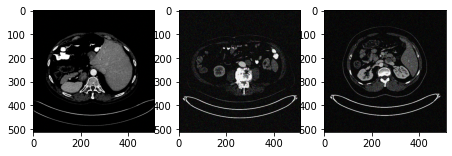

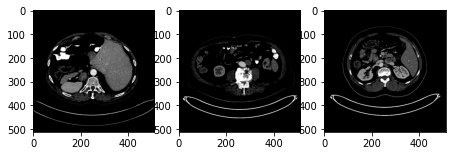

In [0]:
plt.figure(figsize=(10, 10))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(noisy_train[i])
plt.show()

plt.figure(figsize=(10, 10))
for i in range(1,4):
    ax = plt.subplot(1, 4, i)
    plt.imshow(clean_train[i])
plt.show()

In [0]:
# from keras.preprocessing.image import ImageDataGenerator

# data_gen_args = dict()
# #     featurewise_center=True,
# #     featurewise_std_normalization=True,
#     # rotation_range=20,
#     # width_shift_range=0.2,
#     # height_shift_range=0.2,
#     # brightness_range=[0.5, 1.2],
#     # shear_range=0.01,
#     # horizontal_flip=True,
#     # rescale=1/255,
#     # fill_mode='reflect',
#     # data_format='channels_last')

# data_flow_args = dict(
#     target_size = (512, 512),
#     batch_size = 10,
#     class_mode = 'input')

In [0]:
from tensorflow import keras
import keras.layers as layers
import keras.models as models
from keras.initializers import orthogonal

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(noisy_train, clean_train, test_size=0.2, random_state = 100)

# def Conv2DLayer(x, filters, kernal, strides, padding, block_id, kernel_init = orthogonal()):
#   prefix = f'block_{block_id}_'
#   x = layers.Conv2D(filters, kernel_size = kernal, strides = strides, padding = padding, kernel_initializer = kernel_init, name = prefix + 'conv')(x)
#   x = layers.LeakyReLU(name = prefix + 'lrelu')(x)
#   x = layers.Dropout(0.2, name = prefix + 'drop')(x)
#   x = layers.BatchNormalization(name = prefix + 'conv_bn')

# def Transpose_Conv2DLayer(x, filters, kernal, strides, padding, block_id, kernel_init = orthogonal()):
#   prefix = f'block: {block_id}'
#   x = layers.Conv2DTranspose(filters, kernel_size = kernal, strides = strides, padding = padding, kernel_initializer = kernel_init, name = prefix + 'de-conv')(x)
#   x = layers.LeakyReLU(name = prefix + 'lrelu')(x)
#   x = layers.Dropout(0.2, name = prefix + 'drop')((x))
#   x = layers.BatchNormalization(name = prefix + 'conv_bn')(x)

In [0]:
def Conv2DLayer(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
  prefix = f'block_{block_id}_'
  x = layers.Conv2D(filters, kernel_size=kernel, strides=strides, padding=padding,
                    kernel_initializer=kernel_init, name=prefix+'conv')(x)
  x = layers.LeakyReLU(name=prefix+'lrelu')(x)
  x = layers.Dropout(0.2, name=prefix+'drop')((x))
  x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
  return x

def Transpose_Conv2D(x, filters, kernel, strides, padding, block_id, kernel_init=orthogonal()):
  prefix = f'block_{block_id}_'
  x = layers.Conv2DTranspose(filters, kernel_size=kernel, strides=strides, padding=padding,
                              kernel_initializer=kernel_init, name=prefix+'de-conv')(x)
  x = layers.LeakyReLU(name=prefix+'lrelu')(x)
  x = layers.Dropout(0.2, name=prefix+'drop')((x))
  x = layers.BatchNormalization(name=prefix+'conv_bn')(x)
  return x

from keras.optimizers import SGD, Adam

def AutoEncoder():
  inputs = layers.Input(shape=(512, 512, 3), name='image_input')
                          
  # 256 x 256
  conv1 = Conv2DLayer(inputs, 32, 3, strides=1, padding='same', block_id=1)
  conv2 = Conv2DLayer(conv1, 32, 3, strides=2, padding='same', block_id=2)
  
  # 128 x 128
  conv3 = Conv2DLayer(conv2, 64, 5, strides=2, padding='same', block_id=3)
  
  # # 64 x 64
  # conv4 = Conv2DLayer(conv3, 64, 3, strides=1, padding='same', block_id=4)
  # conv5 = Conv2DLayer(conv4, 64, 5, strides=2, padding='same', block_id=5)
  
  # 32 x 32
  conv6 = Conv2DLayer(conv3, 64, 3, strides=2, padding='same', block_id=6)
  
  # 16 x 16
  deconv1 = Transpose_Conv2D(conv6, 64, 3, strides=2, padding='same', block_id=7)
  
  # 32 x 32
  skip1 = layers.concatenate([deconv1, conv3], name='skip1')
  conv7 = Conv2DLayer(skip1, 64, 3, strides=1, padding='same', block_id=8)
  deconv2 = Transpose_Conv2D(conv7, 64, 3, strides=2, padding='same', block_id=9)
  
  # # 64 x 64
  # skip2 = layers.concatenate([deconv2, conv3], name='skip2')
  # conv8 = Conv2DLayer(skip2, 64, 5, strides=1, padding='same', block_id=10)
  # deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
  
  # 128 x 128
  skip3 = layers.concatenate([deconv2, conv2], name='skip3')
  conv9 = Conv2DLayer(skip3, 32, 5, strides=1, padding='same', block_id=12)
  deconv4 = Transpose_Conv2D(conv9, 32, 3, strides=2, padding='same', block_id=13)
  
  # 256 x 256
  skip3 = layers.concatenate([deconv4, conv1])
  conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid', kernel_initializer=orthogonal(), name='final_conv')(skip3)

  model = models.Model(inputs=inputs, outputs=conv10)
  model.compile(optimizer = Adam(lr = 0.002), loss = 'mse', metrics = ['accuracy'])
  # model.fit(X_train, Y_train, epochs = 5, batch_size = 16)
  
  return model


  # inputs = layers.Input(shape = (512, 512, 3), name='image_input')

  # # 256*256
  # conv1 = Conv2DLayer(inputs, 64, 3, strides = 1, padding = 'same', block_id = 1)
  # conv2 = Conv2DLayer(conv1, 64, 3, strides = 2, padding = 'same', block_id = 2)

  # # 128*128
  # conv3 = Conv2DLayer(conv2, 128, 5, strides = 2, padding = 'same', block_id = 1)

  # # 64*64
  # conv4 = Conv2DLayer(conv3, 128, 3, strides = 1, padding = 'same', block_id = 4)
  # conv5 = Conv2DLayer(conv4, 256, 5, strides = 2, padding = 'same', block_id = 5)

  # # 32*32
  # conv6 = Conv2DLayer(conv5, 512, 3, strides = 2, padding = 'same', block_id = 6)

  # # 16*16
  # deconv1 = Transpose_Conv2D(conv6, 512, 3, strides = 2, padding = 'same', block_id = 7)

  # # 32*322
  # skip1 = layers.concatenate([deconv1, conv5], name = 'skip1')
  # conv7 = Conv2DLayer(skip1, 256, 3, strides = 1, padding = 'same', block_id = 8)
  # deconv2 = Transpose_Conv2D(conv7, 128, 3, strides = 2, padding = 'same', block_id = 9)

  # # 64*64
  # skip2 = layers.concatenate([deconv2, conv3], name = 'skip2')
  # conv8 = Conv2DLayer(skip2, 128, 5, strides = 1, padding = 'same', block_id = 10)
  # deconv3 = Transpose_Conv2D(conv8, 64, 3, strides = 2, padding = 'same', block_id = 11)

  # # 128*128
  # skip3 = layers.concatenate([deconv3, conv2], name = 'skip3')
  # conv9 = Conv2DLayer(skip3, 64, 5, strides = 1, padding = 'same', block_id = 12)
  # deconv4 = Transpose_Conv2D(conv9, 64, 3, strides = 2, padding = 'same', block_id = 13)

  # # 256*256
  # skip4 = layers.concatenate([deconv4, conv1])
  # conv10 = layers.Conv2D(3, 3, strides = 1, padding = 'same', activation = 'sigmoid', kernel_initializer = orthogonal(), name ='final_conv')(skip3)

  # outputs = conv10

  # return models.Model(inputs = inputs, outputs = outputs)

In [0]:
# def model_autoencoder(X_train, Y_train):  
#   #Model Autoencoder
#   from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
#   from tensorflow.keras.layers import Dense, Input, GaussianNoise, LeakyReLU, BatchNormalization
#   from tensorflow.keras.models import Sequential
#   model = Sequential()
#   model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(512, 512, 3)))
#   # model.add(GaussianNoise(0.5))
#   model.add(BatchNormalization())
#   model.add(MaxPooling2D((2, 2), padding='same'))
#   model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
#   model.add(BatchNormalization())
#   model.add(MaxPooling2D((2, 2), padding='same'))
#   model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
  

#   model.add(MaxPooling2D((2, 2), padding='same'))
      
#   model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
#   model.add(BatchNormalization())
#   model.add(UpSampling2D((2, 2)))
#   model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
#   model.add(BatchNormalization())
#   model.add(UpSampling2D((2, 2)))
#   model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#   model.add(BatchNormalization())
#   model.add(UpSampling2D((2, 2)))
#   model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))
#   model.add(BatchNormalization())

#   model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#   # input_img = Input(shape=(32, 32, 3))
#   # x = Conv2D(32, (3, 3), padding='same')(input_img)
#   # x = BatchNormalization()(x)
#   # x = Activation('relu')(x)
#   # x = MaxPooling2D((2, 2), padding='same')(x)
#   # x = Conv2D(32, (3, 3), padding='same')(x)
#   # x = BatchNormalization()(x)
#   # x = Activation('relu')(x)
#   # encoded = MaxPooling2D((2, 2), padding='same')(x)

#   # x = Conv2D(32, (3, 3), padding='same')(encoded)
#   # x = BatchNormalization()(x)
#   # x = Activation('relu')(x)
#   # x = UpSampling2D((2, 2))(x)
#   # x = Conv2D(32, (3, 3), padding='same')(x)
#   # x = BatchNormalization()(x)
#   # x = Activation('relu')(x)
#   # x = UpSampling2D((2, 2))(x)
#   # x = Conv2D(3, (3, 3), padding='same')(x)
#   # x = BatchNormalization()(x)
#   # decoded = Activation('sigmoid')(x)

#   model.summary()
#   model.fit(X_train, Y_train, epochs = 10, batch_size = 16)

#   return model

In [0]:
# layers = [input_dims, 3000, 1000, 500, 300, 100]
# epoch = 5
# optimizer = 'adamax'
# activation = 'relu'
# loss = 'mse'

In [0]:
# def stack_autoencoder():

#   encoder =[]
#   decoder =[]
#   auto_e = []
  
#   model = AutoEncoder()

#   inputs = layers.Input(shape=(512, 512, 3), name='image_input')
  
#   conv1 = Conv2DLayer(inputs, 32, 3, strides=1, padding='same', block_id=1)
#   conv2 = Conv2DLayer(conv1, 32, 3, strides=2, padding='same', block_id=2)
  
#   # 128 x 128
#   conv3 = Conv2DLayer(conv2, 64, 5, strides=2, padding='same', block_id=3)
  
#   # # 64 x 64
#   # conv4 = Conv2DLayer(conv3, 64, 3, strides=1, padding='same', block_id=4)
#   # conv5 = Conv2DLayer(conv4, 64, 5, strides=2, padding='same', block_id=5)
  
#   # 32 x 32
#   conv6 = Conv2DLayer(conv3, 64, 3, strides=2, padding='same', block_id=6)
  
#   # 16 x 16
#   deconv1 = Transpose_Conv2D(conv6, 64, 3, strides=2, padding='same', block_id=7)
  
#   # 32 x 32
#   skip1 = layers.concatenate([deconv1, conv3], name='skip1')
#   conv7 = Conv2DLayer(skip1, 64, 3, strides=1, padding='same', block_id=8)
#   deconv2 = Transpose_Conv2D(conv7, 64, 3, strides=2, padding='same', block_id=9)
  
#   # # 64 x 64
#   # skip2 = layers.concatenate([deconv2, conv3], name='skip2')
#   # conv8 = Conv2DLayer(skip2, 64, 5, strides=1, padding='same', block_id=10)
#   # deconv3 = Transpose_Conv2D(conv8, 64, 3, strides=2, padding='same', block_id=11)
  
#   # 128 x 128
#   skip3 = layers.concatenate([deconv2, conv2], name='skip3')
#   conv9 = Conv2DLayer(skip3, 32, 5, strides=1, padding='same', block_id=12)
#   deconv4 = Transpose_Conv2D(conv9, 32, 3, strides=2, padding='same', block_id=13)
  
#   # 256 x 256
#   skip3 = layers.concatenate([deconv4, conv1])
#   conv10 = layers.Conv2D(3, 3, strides=1, padding='same', activation='sigmoid', kernel_initializer=orthogonal(), name='final_conv')(skip3)

#   model_enc = models.Model(inputs=inputs, outputs=conv10)
#   model_enc.compile(optimizer = Adam(lr = 0.002), loss = 'mse', metrics = ['accuracy'])

#   encoder.append(model.layers[2].get_weights())
#   decoder.append(model.layers[3].get_weights())
#   auto_e.append(model)

#   return auto_e

In [0]:
model = AutoEncoder()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
block_1_conv (Conv2D)           (None, 512, 512, 32) 896         image_input[0][0]                
__________________________________________________________________________________________________
block_1_lrelu (LeakyReLU)       (None, 512, 512, 32) 0           block_1_conv[0][0]               
__________________________________________________________________________________________________
block_1_drop (Dropout)          (None, 512, 512, 32) 0           block_1_lrelu[0][0]              
____________________________________________________________________________________________

In [0]:
# model2 = stack_autoencoder()
# # model2.summary()
# for i in range(len(model2)):
#     model2[i].save("pre_train_l1" + str(i) + ".hd5")

In [0]:
# def fine_tuning():
#   encoder = []
#   decoder = []

#   for i in range(len(test)):
#     encoder.appendmodel2[i].layers[2].get_weights())
#     decoder.append(model2[i].layers[3].get_weights())
 
#   ft.compile(loss='mse', optimizer=Adam(), metrics=['accuracy'])
#   ft.fit(X_train, Y_train, epochs = 5, batch_size = 16)
#   ft.summary()

#   return ft

In [0]:
# train_datagen = ImageDataGenerator()

# train_batches = train_datagen.flow_from_directory(new_path , target_size = (512, 512), batch_size = 10, class_mode = 'input')
# train_noisy_batches = gauss_noise_gen(train_batches, 10)
# noisy_images_train = gauss_noise_gen() 

In [0]:
# model.fit(train_noisy, 
#           steps_per_epoch = train_batches.samples // batch_size,
#           epochs = 10,
#           verbose=1, 
#           validation_data = val_noisy_batches,
#           validation_steps = train_batches.samples // batch_size,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(noisy_train, clean_train, test_size=0.2, random_state = 100)

model.fit(X_train, Y_train, epochs = 10, batch_size = 8)

Epoch 1/10
747/747 [==============================] - 33s 44ms/step - loss: 0.0281 - accuracy: 0.2912
Epoch 2/10
747/747 [==============================] - 28s 38ms/step - loss: 0.0043 - accuracy: 0.3442
Epoch 3/10
747/747 [==============================] - 28s 38ms/step - loss: 0.0072 - accuracy: 0.3330
Epoch 4/10
747/747 [==============================] - 28s 38ms/step - loss: 0.0026 - accuracy: 0.3292
Epoch 5/10
747/747 [==============================] - 28s 38ms/step - loss: 0.0018 - accuracy: 0.3918
Epoch 6/10
747/747 [==============================] - 28s 38ms/step - loss: 0.0015 - accuracy: 0.3916
Epoch 7/10
747/747 [==============================] - 28s 38ms/step - loss: 0.0014 - accuracy: 0.3773
Epoch 8/10
747/747 [==============================] - 28s 38ms/step - loss: 0.0011 - accuracy: 0.3714
Epoch 9/10
747/747 [==============================] - 28s 38ms/step - loss: 0.0011 - accuracy: 0.3608
Epoch 10/10
747/747 [==============================] - 28s 38ms/step - loss: 9.593

In [0]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(Y_test))[1]*100))

187/187 [==============================] - 5s 25ms/step
Test_Accuracy: 37.31%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if sys.path[0] == '':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


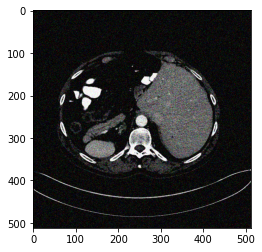

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


(512, 512, 3)


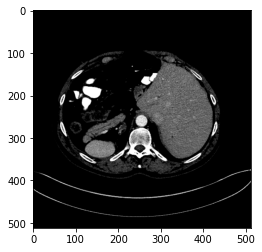

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


(512, 512, 3)


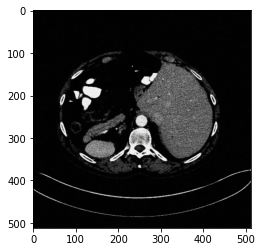

In [0]:
#Prdiction
import scipy.misc
from scipy.misc import imsave
from PIL import Image

from PIL import Image
import numpy as np


denoise_img = model.predict(X_test)

# data = X_test[5]
scipy.misc.imsave("drive/My Drive/denoise_data/Gauss_noise.png", X_test[5])
# #Rescale to 0-255 and convert to uint8
# rescaled = (255.0 / data.max() * (data - data.min())).astype(np.uint8)

# im = Image.fromarray(data)
# im.save("drive/My Drive/denoise_data/Gauss_noise.png")

# gauss_noise_img = X_test[5]
plt.imshow(X_test[5])
# cv2.imwrite("drive/My Drive/denoise_data/Gauss_noise.png", X_test[5])

# im = Image.fromarray(X_test[5])
# im.save("drive/My Drive/denoise_data/Gauss_noise.png")

# X_test[5].save("drive/My Drive/denoise_data/Gauss_noise.png")

# plt.imsave("drive/My Drive/denoise_data/Gauss_noise.png", gauss_noise_img)


# img = cv2.imread(x_train[4])
# cv2.imwrite("Resulted.png", x_test[2])
print(X_test[5].shape)
# plt.axis('off')
# plt.savefig("drive/My Drive/denoise_data/Gauss_noise.png")
plt.show()



plt.imshow(Y_test[5])

scipy.misc.imsave("drive/My Drive/denoise_data/original.png", Y_test[5])
print(Y_test[5].shape)
# plt.axis('off')
# plt.savefig("drive/My Drive/denoise_data/original.png")
plt.show()



plt.imshow(denoise_img[5])
scipy.misc.imsave("drive/My Drive/denoise_data/Denoise.png", denoise_img[5])
print(denoise_img[5].shape)
# plt.axis('off')
# plt.savefig("drive/My Drive/denoise_data/Denoise.png")
plt.show()


In [0]:
!pip install -U scipy==1.2.0

     |████████████████████████████████| 26.6MB 97kB/s 
ERROR: tensorflow 2.2.0rc3 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [0]:
# ty_img = Y_test[5]
# plt.imsave("drive/My Drive/denoise_data/original.png", ty_img)
# t_img = X_test[5]
# plt.imsave("drive/My Drive/denoise_data/Gauss_noise.png", t_img)
# d_img = denoise_img[5]
# plt.imsave("drive/My Drive/denoise_data/Denoise.png", d_img)

In [0]:
from skimage import io,img_as_float
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle

im_path = "drive/My Drive/denoise_data/NF(0.1)/bm3d_anis_img.png"
img=io.imread(im_path)
# img = denoise_img[5]

# denoised_img=denoise_tv_chambolle(img,weight=0.1,eps=2.e-4,n_iter_max=200,multichannel=True)

# # plt.imsave("drive/My Drive/denoise_data/tv_denoise_img.png",denoised_img)
# scipy.misc.imsave("drive/My Drive/denoise_data/NF(0.1)/bm3d_anis_tv_img.png", denoised_img)
# plt.imshow(denoised_img)
# plt.show()

In [0]:
import bm3d
import scipy.misc
from scipy.misc import imsave
from PIL import Image
from skimage import io,img_as_float
import matplotlib.pyplot as plt
from skimage.restoration import denoise_tv_chambolle

# im_path = "drive/My Drive/denoise_data/NF(0.5)/Anisotropic.png"
# img=io.imread(im_path)

# # img = denoise_img[5]
# bm3d_img=bm3d.bm3d(img,sigma_psd=0.2,stage_arg=bm3d.BM3DStages.ALL_STAGES)
# scipy.misc.imsave("drive/My Drive/denoise_data/NF(0.5)/anis_bm3d_img.png", bm3d_img)
# # plt.imsave("drive/My Drive/denoise_data/bm3d_img.png",bm3d_img)

# plt.imshow(bm3d_img)
# plt.show()

ModuleNotFoundError: ignored

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: image is size 3 on the last axis, but multichannel is False.  If this is a color image, please set multichannel to True for proper noise estimation.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if sys.path[0] == '':
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


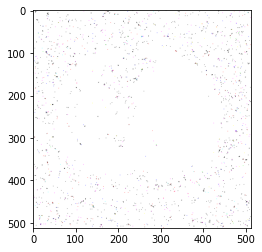

In [0]:
from skimage.restoration import denoise_nl_means, estimate_sigma

# im_path = "drive/My Drive/denoise_data/bm3d_img.png"
# img=io.imread(im_path)

sigma_est = np.mean(estimate_sigma(img, multichannel=False))
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                multichannel=True)

nlm_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, **patch_kw)
scipy.misc.imsave("drive/My Drive/denoise_data/nlm_img.png", nlm_img)
# plt.imsave("drive/My Drive/denoise_data/nlm_img.png",nlm_img,cmap=plt.cm.gray)

plt.imshow(nlm_img)
plt.show()

In [0]:
from skimage import io,img_as_float
import matplotlib.pyplot as plt
from medpy.filter.smoothing import anisotropic_diffusion
import numpy as np

# im_path="/home/virusns/Desktop/DIC/Pancreas/Denoising/org.png"
im_path = "drive/My Drive/denoise_data/NF(0.1)/bm3d_img.png"
img=io.imread(im_path)


img=img_as_float(io.imread(im_path,as_gray=True))

anisotropic=anisotropic_diffusion(img,niter=10,kappa=60,gamma=0.1,option=2)
plt.imsave("drive/My Drive/denoise_data/NF(0.1)/bm3d_anis_img.png",anisotropic)

/usr/local/lib/python3.6/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.6/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


In [0]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 


# img_path="/home/virusns/Desktop/DIC/Pancreas/Denoising/org.png"
im_path = "drive/My Drive/denoise_data/NF(0.5)/Denoise.png"
img=io.imread(im_path)
# img=cv2.imread(im_path)
bilateral_img= cv2.bilateralFilter(img,9,75,75)
#bilateral_img=bilateral_img.astype(np.fl)

plt.imsave("drive/My Drive/denoise_data/NF(0.5)/bilateral.png",bilateral_img)

In [0]:
from scipy import ndimage
im_path = "drive/My Drive/denoise_data/NF(0.5)/bilateral.png"
img=io.imread(im_path)
im_med = ndimage.median_filter(img, 3)
#im_med=cv2.medianBlur(im,5)
plt.figure(figsize=(16, 5))
plt.imsave("drive/My Drive/denoise_data/NF(0.5)/med_bil.png",im_med)

<Figure size 1152x360 with 0 Axes>

In [0]:
pip install bm3d

     |████████████████████████████████| 8.4MB 2.7MB/s 


In [0]:
# im1 = tf.image.convert_image_dtype(X_test[5], tf.float64)
# im2 = tf.image.convert_image_dtype(denoised_img, tf.float64)
# psnr2 = tf.image.psnr(im1, im2, max_val=1.0)
# print(psnr2)

# ssim1 = tf.image.ssim(im1, im2, max_val = 255)
# print(ssim1)

In [0]:
pip install medpy

     |████████████████████████████████| 153kB 2.5MB/s 
     |████████████████████████████████| 42.5MB 74kB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp36-cp36m-linux_x86_64.whl size=753411 sha256=ee15af3e4e5390d3e7db528f68c2721da1419ffc7f626e5632e783c71f22dfb5
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built medpy


In [0]:
# test_noisy = gauss_noise_gen(train_dir, 10)
# noisy = []
# # Noisy Images
# for img in os.listdir(new_path):
#   full_new_path = os.path.join(new_path, img)
#   img = load_img(full_new_path, grayscale=True,target_size=(512, 512))
#   img = img_to_array(img).astype('float32')/255.
#   noisy.append(img)
# noisy = np.array(noisy)
# print(noisy.shape)
# # X, Y = next(test_noisy)

# # score = model.evaluate(test_noisy, verbose=1)
# # print('Test loss:', score[0])
# # print('Test accuracy:', score[1])

# model.predict(noisy)

In [0]:
# # test_noisy = gauss_noise_gen(train_dir, 10)
# sample_test = load_img(X_train, target_size=(512, 512))
# sample_test = img_to_array(sample_test)
# sample_test_img = sample_test.astype('float32')/255.
# sample_test_img = np.expand_dims(sample_test, axis=0)

# # Get the predition
# predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

# f, ax = plt.subplots(1,2, figsize=(10,8))
# ax[0].imshow(np.squeeze(sample_test), cmap='gray')
# ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
# plt.show()

In [0]:
# f, ax = plt.subplots(1,2, figsize=(10,8))
# ax[0].imshow(np.squeeze(X_train[10]), cmap='gray')
# sample_test = load_img(X_train, grayscale=True, target_size=(512, 512))
# sample_test = img_to_array(X_train)
# sample_test_img = sample_test.astype('float32')/255.
# sample_test_img = np.expand_dims(sample_test, axis=0)
# predicted_label = np.squeeze(AutoEncoder.predict(sample_test_image))
# ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
# plt.show()

In [0]:
pip install --upgrade scikit-image

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.6/dist-packages (0.16.2)


In [0]:
pip install SSIM-PIL

In [0]:
from math import log10, sqrt 
# import cv2 
import numpy as np 
  
def PSNR(original, compressed): 
  mse = np.mean((original - compressed) ** 2) 
  if(mse == 0): 
    return 100
  # MSE is zero means no noise is present in the signal . 
  # Therefore PSNR have no importance. 
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse)) 
  return psnr 
  

def MSE(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	# err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	# err /= float(imageA.shape[0] * imageA.shape[1])

  Y = np.square(np.subtract(imageA,imageB)).mean()
  print("MSE:", Y)
  print('RMSE: ', np.sqrt(Y))
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	# return err


noised = cv2.imread("drive/My Drive/denoise_data/NF(0.5)/Gauss_noise.png") 
denoised = cv2.imread("drive/My Drive/denoise_data/NF(0.5)/Denoise.png") 
# denoised = denoise_image[2]
# plt.imshow(denoised)
# noised = X_test[2]
# plt.imshow(noised)
# plt.show()
# plt.imshow(denoised)
noised = noised.astype(np.float64) / 255.
denoised = denoised.astype(np.float64) / 255.

In [0]:
value = PSNR(noised, denoised) 
print(f"PSNR value is {value} dB") 

PSNR value is 58.09171858097702 dB


In [0]:
value = MSE(noised, denoised) 
print(f"MSE value is {value} dB") 

MSE: 0.10090402789166625
RMSE:  0.31765394361107224
MSE value is None dB


In [0]:
# # import skimage.measure
# # from skimage.measure import structural_similarity as ssim

# from SSIM_PIL import compare_ssim
# image1 = Image.open('drive/My Drive/denoise_data/Gauss_noise.png')
# image2 = Image.open('drive/My Drive/denoise_data/nlm_img.png')
# # image1 = image1.astype(np.float64) / 255.
# # image2 = image2.astype(np.float64) / 255.
# s = compare_ssim(image1, image2)

# print("SSIM: {}".format(s))

In [0]:
# from PIL import Image # No need for ImageChops
# import math
# from skimage import img_as_float
# from skimage.metrics import mean_squared_error as mse
# from skimage.metrics import structural_similarity as ssim
# from skimage.metrics import peak_signal_noise_ratio as psnr

# def rmsdiff(im1, im2):
#     """Calculates the root mean square error (RSME) between two images"""
#     return math.sqrt(mse(img_as_float(im1), img_as_float(im2)))

# def msediff(im1, im2):
#     """Calculates the root mean square error (RSME) between two images"""
#     return mse(img_as_float(im1), img_as_float(im2))

# def psnr(im1, im2):
#   return psnr(img_as_float(im1), img_as_float(im2))

# def ssim(im1, im2):
#   return ssim(img_as_float(im1), img_as_float(im2))

In [0]:
# rms_value = rmsdiff(noised, denoised)
# print('RMSE: ', rms_value)

# mse_value = msediff(noised, denoised)
# print('MSE: ', mse_value)

# ssim_value = ssim(noised, denoised)
# print('MSE: ', ssim_value)

# psnr_value = psnr(noised, denoised)
# print('MSE: ', psnr_value)

In [0]:
# from PIL import Image, ImageChops
# import math
# import numpy as np

# def rmsdiff(im1, im2):
#     """Calculates the root mean square error (RSME) between two images"""
#     errors = np.asarray(ImageChops.difference(im1, im2)) / 255
#     return math.sqrt(np.mean(np.square(errors)))

In [0]:
# rms_value = rmsdiff(noised, denoised)
# print(rms_value)

In [0]:
# def MSE(imageA, imageB):
#   err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
#   err /= float(imageA.shape[0] * imageA.shape[1])
#   return err

# value = MSE(noised, denoised)
# print(value)
# # print(value ** 2)

In [0]:
# from tensorflow import image
# from tensorflow import io

# im1 = tf.image.decode_png(tf.io.read_file('drive/My Drive/denoise_data/Gauss_noise.png'))
# im2 = tf.image.decode_png(tf.io.read_file('drive/My Drive/denoise_data/nlm_img.png'))
# # Compute PSNR over tf.uint8 Tensors.
# psnr1 = tf.image.psnr(im1, im2, max_val=255)
# print(psnr1)

# im1 = tf.image.convert_image_dtype(im1, tf.float64)
# im2 = tf.image.convert_image_dtype(im2, tf.float64)
# psnr2 = tf.image.psnr(im1, im2, max_val=1.0)
# print(psnr2)

# ssim1 = tf.image.ssim(im1, im2, max_val = 255)
# print(ssim1)

# mse1 = tf.keras.losses.MSE(im1, im2)
# # loss = mse([0., 0., 1., 1.], [1., 1., 1., 0.])
# # print('Loss: ', loss.numpy())
# # mse1 = tf.keras.losses.MeanSquaredError(im1, im2)
# print(mse1)

In [0]:
# import tensorflow as tf
# # from tensorflow import to_float
# tf.to_float = lambda x: tf.cast(x, tf.float64)

# def mean_squared_error(true, pred):
#   true = tf.image.convert_image_dtype(true, tf.float64)
#   pred = tf.image.convert_image_dtype(pred, tf.float64)
#   return tf.reduce_sum(tf.square(true - pred)) / tf.to_float(tf.size(pred))

In [0]:
# mse2 = mean_squared_error(im1, im2)
# print(mse2)

In [0]:
# from tensorflow import image
# from tensorflow import io

# im1 = tf.image.decode_png(tf.io.read_file('drive/My Drive/denoise_data/Gauss_noise.png'))
# im2 = tf.image.decode_png(tf.io.read_file('drive/My Drive/denoise_data/tv_denoise_img.png'))
# # Compute PSNR over tf.uint8 Tensors.
# psnr1 = tf.image.psnr(im1, im2, max_val=255)
# print(psnr1)

# im1 = tf.image.convert_image_dtype(im1, tf.float64)
# im2 = tf.image.convert_image_dtype(im2, tf.float64)
# psnr2 = tf.image.psnr(im1, im2, max_val=1.0)
# print(psnr2)

# ssim1 = tf.image.ssim(im1, im2, max_val = 255)
# print(ssim1)

# mse1 = tf.keras.losses.MSE(im1, im2)
# # loss = mse([0., 0., 1., 1.], [1., 1., 1., 0.])
# # print('Loss: ', loss.numpy())
# # mse1 = tf.keras.losses.MeanSquaredError(im1, im2)
# print(mse1)

In [0]:
# import tensorflow as tf
# # from tensorflow import to_float
# tf.to_float = lambda x: tf.cast(x, tf.float64)

# def mean_squared_error(true, pred):
#   true = tf.image.convert_image_dtype(true, tf.float64)
#   pred = tf.image.convert_image_dtype(pred, tf.float64)
#   return tf.reduce_sum(tf.square(true - pred)) / tf.to_float(tf.size(pred))

# mse2 = mean_squared_error(im1, im2)
# print(mse2)

In [0]:
from skimage import io,img_as_float

org_path= 'drive/My Drive/denoise_data/Gauss_noise.png'
original=img_as_float(io.imread(org_path,as_gray=True))

denoised_path= 'drive/My Drive/denoise_data/Denoise.png'
denoised=img_as_float(io.imread(denoised_path,as_gray=True))

In [0]:
from skimage.metrics import (mean_squared_error,peak_signal_noise_ratio,structural_similarity)

psnr=peak_signal_noise_ratio(original,denoised)
mse=mean_squared_error(original,denoised)
ssim=structural_similarity(original,denoised)

print(psnr)
print(mse)
print(ssim)

10.051591984346942
0.09881907891917659
0.15430316746708142


In [0]:
denoised_path= 'drive/My Drive/denoise_data/tv_denoise_img.png'
denoised=img_as_float(io.imread(denoised_path,as_gray=True))

psnr=peak_signal_noise_ratio(original,denoised)
mse=mean_squared_error(original,denoised)
ssim=structural_similarity(original,denoised)

print(psnr)
print(mse)
print(ssim)

10.03935467764948
0.09909791845040503
0.13209172349120019


In [0]:
denoised_path= 'drive/My Drive/denoise_data/bm3d_img.png'
denoised=img_as_float(io.imread(denoised_path,as_gray=True))

psnr=peak_signal_noise_ratio(original,denoised)
mse=mean_squared_error(original,denoised)
ssim=structural_similarity(original,denoised)

print(psnr)
print(mse)
print(ssim)

10.051660530423279
0.09881751923860167
0.15431356326732737


In [0]:
denoised_path= 'drive/My Drive/denoise_data/nlm_img.png'
denoised=img_as_float(io.imread(denoised_path,as_gray=True))

psnr=peak_signal_noise_ratio(original,denoised)
mse=mean_squared_error(original,denoised)
ssim=structural_similarity(original,denoised)

print(psnr)
print(mse)
print(ssim)

10.049040554185718
0.09887715104885025
0.15397959702518416


In [0]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# image = cv2.imread('drive/My Drive/denoise_data/Denoise.png')
# # image = denoised
# plt.imshow(image)
# plt.show()

# # sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# # sharpen = cv2.filter2D(image, -1, sharpen_kernel)

# # plt.imshow('sharpen', sharpen)
# # plt.show()

In [0]:
pip install sewar

  Created wheel for sewar: filename=sewar-0.4.3-cp36-none-any.whl size=10348 sha256=e726dc504be15c875f9d5c1bdd2db6963121236ba9b7dec4c86f9b09a53bf93f
  Stored in directory: /root/.cache/pip/wheels/89/b2/ac/ea4b697b7c2393afe8f6f63b54ae6c26ee9fa9debd33e3926e
Successfully built sewar


In [0]:
from sewar.full_ref import uqi, mse, rmse, psnr, rmse_sw, uqi, ssim, ergas, scc, rase, sam, msssim, vifp, psnrb 

noise_img = 'drive/My Drive/denoise_data/Gauss_noise.png'
denoise = 'drive/My Drive/denoise_data/Denoise.png'
bm3d_path = 'drive/My Drive/denoise_data/bm3d_img.png'
nlm_path = 'drive/My Drive/denoise_data/nlm_img.png'
tv_path = 'drive/My Drive/denoise_data/tv_denoise_img.png'

print(ssim(noise_img, denoise))
print(psnr(noise_img, denoise))
print(mse(noise_img, denoise))

AttributeError: ignored

In [0]:
import math
import numpy as np

def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

print(calculate_psnr(noise_img, denoise))

AttributeError: ignored